

# Project: Investigate a tmdb-movies.csv

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [7]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import seaborn as sns
#import matpolitlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



In [10]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning 
#### 1- we need to re-order the columns :
the title should be before the budget
#### 2- dealing with missing values
imdb_id               10856
cast                  10790
genres                10843
production_companies  9836
#### removing rows where revenue_adj and budget_adj is equal to zero
#Q.1: which movies with the hieghest budget
#Q.2: which movies with the hieghest revenue
#Q.3: Top Movies based on their popularity

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#remving movies which have no cast, geners or with budget_adj & revenue_adj=0 
df = df[df["cast"].isnull() == False]
df = df[df["genres"].isnull() == False]


df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]

In [7]:
#removing movies with no imdb_id or production_companies
df = df[df["imdb_id"].isnull() == False]
df = df[df["production_companies"].isnull() == False]


In [8]:
df.shape

(3807, 21)

In [11]:
#the the given in the dataset is in string format.
#So we need to change this in datetime format
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

### re-ordering the columns

In [10]:
print(list(df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [ ]:
newCols = ['id', 'imdb_id', 'original_title', 'budget', 'revenue', 'popularity', 'cast', 'genres', 'release_date', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'homepage', 'production_companies', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']

df = df[newCols] df.head()

### chech for duplicates and remove them

In [17]:
df.duplicated().sum()

1

In [22]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

### Check for null values and removing them

In [29]:
df.isnull().sum()

id                      0
imdb_id                 0
original_title          0
budget                  0
revenue                 0
popularity              0
cast                    0
genres                  0
release_date            0
overview                0
runtime                 0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [28]:
df.dropna(axis=1,inplace=True)

In [30]:
df.shape

(3806, 17)

In [31]:
df.head()

,id,imdb_id,original_title,budget,revenue,popularity,cast,genres,release_date,overview,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,Jurassic World,150000000,1513528810,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,6/9/15,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,Mad Max: Fury Road,150000000,378436354,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,5/13/15,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,Insurgent,110000000,295238201,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,3/18/15,Beatrice Prior must confront her inner demons ...,119,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,Star Wars: The Force Awakens,200000000,2068178225,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,12/15/15,Thirty years after defeating the Galactic Empi...,136,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,Furious 7,190000000,1506249360,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,4/1/15,Deckard Shaw seeks revenge against Dominic Tor...,137,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [32]:
print(list(df.columns.values))

['id', 'imdb_id', 'original_title', 'budget', 'revenue', 'popularity', 'cast', 'genres', 'release_date', 'overview', 'runtime', 'production_companies', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (10 top movies with the hieghest budget)


#Q.1: which movies with the hieghest budget
#Q.2: which movies with the hieghest revenue
#Q.3: Top Movies based on their popularity



In [34]:
#basic descriptive statistics
df.describe()

,id,budget,revenue,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3806.000000,3.806000e+03,3.806000e+03,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000,3.806000e+03,3.806000e+03
mean,40033.916185,3.759921e+07,1.089477e+08,1.203507,109.362585,534.021545,6.170468,2001.230951,4.470913e+07,1.386824e+08
std,67578.000757,4.231970e+07,1.772814e+08,1.480473,19.855679,883.682139,0.792355,11.328658,4.488587e+07,2.169786e+08
min,5.000000,1.000000e+00,2.000000e+00,0.010335,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5932.500000,1.000000e+07,1.429262e+07,0.470635,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.923514e+07
50%,11255.000000,2.500000e+07,4.620904e+07,0.810226,106.000000,208.500000,6.200000,2004.000000,3.038360e+07,6.283467e+07
75%,38578.000000,5.000000e+07,1.260625e+08,1.387058,119.000000,584.000000,6.700000,2010.000000,6.083489e+07,1.657273e+08
max,417859.000000,4.250000e+08,2.781506e+09,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


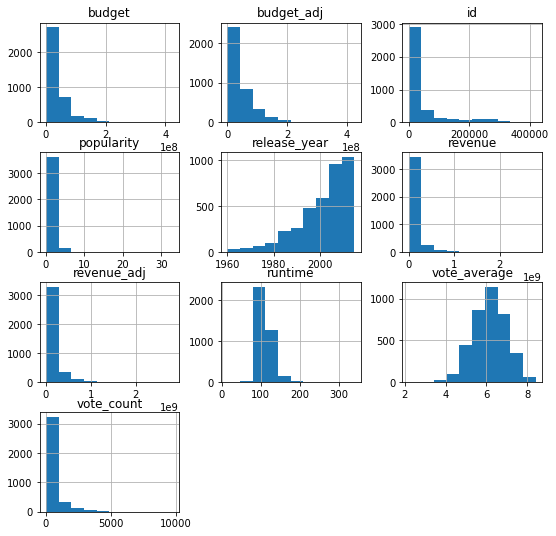

In [39]:
df.hist(figsize=(9,9));


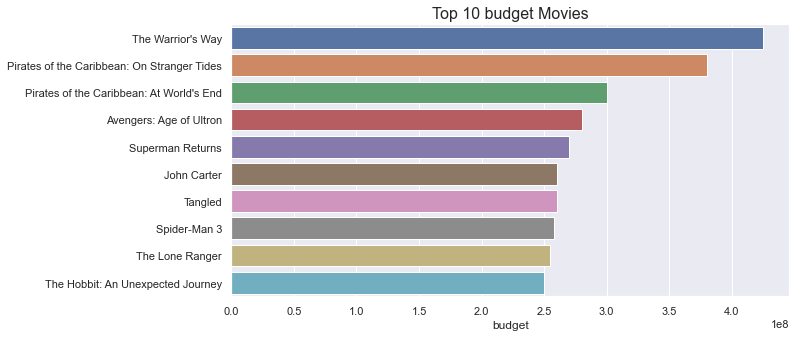

In [31]:

###Top Movies based on their budget 
#sort the 'budget' column in decending order and store it in the new dataframe,
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title']=df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['budget'][:10])

#make a plot
ax = sns.barplot(x=y,y=x)

#set the figure size
sns.set(rc={'figure.figsize':(10,5)})

#set the title and labels of the plot.
ax.set_title("Top 10 budget Movies",fontsize = 16)
ax.set_xlabel("budget",fontsize = 12)
sns.set_style("darkgrid")

### Research Question 2  (10 top Movies based on their revenue)

##### We can notice that "The warrior's way" has the highest budget 

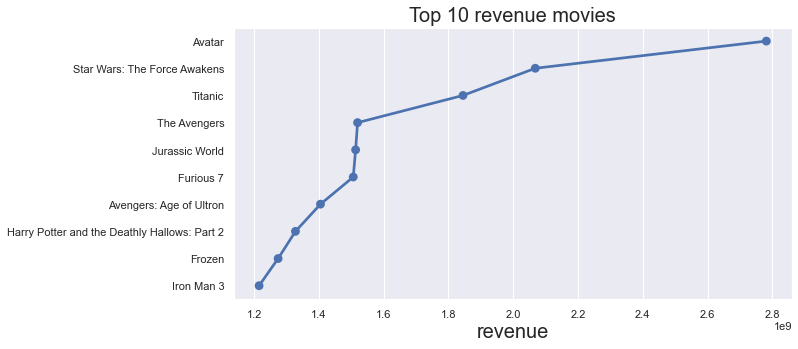

In [52]:
###Top Movies based on their revenue 
#sort the 'revenue' column in decending order and store it in the new dataframe,
info_rev=pd.DataFrame(df['revenue'].sort_values(ascending=False))
info_rev['original_title']=df['original_title']
data_rev=list(map(str,info_rev['original_title']))
y = list(data_rev[:10])
x = list(info_rev['revenue'][:10])


#make a plot
ax=sns.pointplot(x=x,y=y)

#set the figure size
sns.set(rc={'figure.figsize':(16,8)})

#set the title and labels of the plot.
ax.set_title("Top 10 revenue movies",fontsize=20)
ax.set_xlabel("revenue",fontsize=20)
sns.set_style("darkgrid")

#### According to the  plot "Avatar" movie has the highest revenue

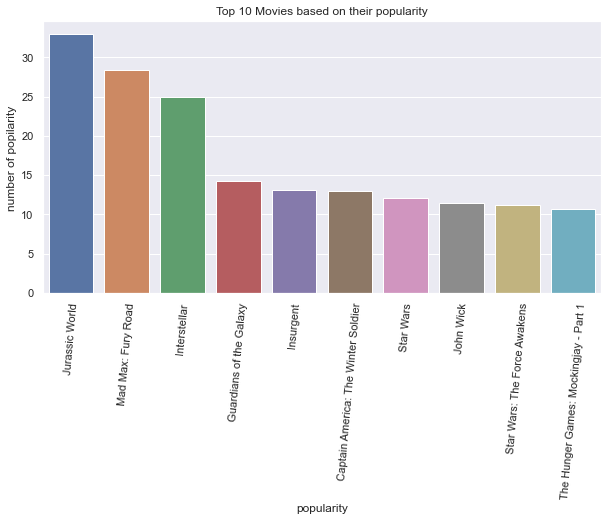

In [68]:
###Top Movies based on their popularity 
#sort the 'popularity' column in decending order and store it in the new dataframe,
info_pop = pd.DataFrame(df['popularity'].sort_values(ascending = False))
info_pop['original_title']=df['original_title']
data_pop = list(map(str,(info_pop['original_title'])))
y = list(data_pop[:10])e highe
x = list(info_pop['popularity'][:10])

#make a plot
ax = sns.barplot(x=y,y=x)

#set the figure size
sns.set(rc={'figure.figsize':(10,5)})

# Rotating the text:
for item in ax.get_xticklabels():
    item.set_rotation(85)

#set the title and labels of the plot.    
ax.set(xlabel='popularity', ylabel='number of popilarity ', title = 'Top 10 Movies based on their popularity');


### The most popular movie is "Jurassic World"

In [65]:
#calculate profit for each movie 
#add a new column in the dataframe name 'profit'
df['profit']=df['revenue']-df['budget']


In [96]:
high_i=df['profit'].idxmax()
high=pd.DataFrame(df.loc[high_i,:])
#df['original_title'][high_i]
print("The movie with the highest profit is:",df['original_title'][high_i])

low_i=df['profit'].idxmin()
low=pd.DataFrame(df.loc[low_i,:])
#df['original_title'][low_i]
print("The movie with the lowest profit is:",df['original_title'][low_i])
pd.concat([high,low],axis = 1)




The movie with the highest profit is: Avatar
The movie with the lowest profit is: The Warrior's Way


,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.avatarmovie.com/,http://www.iamrogue.com/thewarriorsway
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.


#### We can observe that  "avater" movie with the highest revenue also has the highest profit.
##### on the other hand "The warrior's way" has the highest budget but has the lowest profit

In [97]:
# Note: in this cell I googled for this part and used some codes as reference

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })


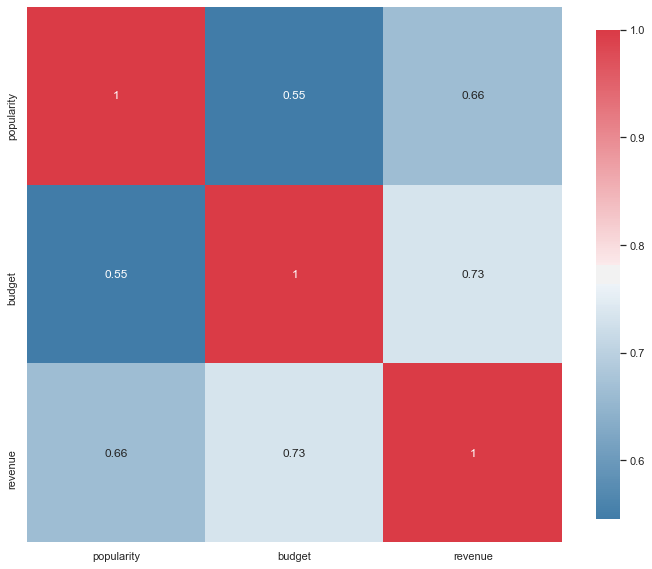

In [108]:
#plot_correlation_map(df[['popularity','budget','profit']])
plot_correlation_map(df[['popularity','budget','revenue']])

<a id='conclusions'></a>
## Conclusions
<ul>
<li>"Avater" movie has the highest revenue and the highest profit but it is not one of the top 10 based on popularity.</li>
<li>The warrior's way" has the highest budget but has the lowest profit</li>
<li>"Jurassic World" is the most popular movie </li>
<li>  
<h2> budget VS revenue</h2>
  <ul>
The revenue increases slightly. There is a good possibility that movies with higher investments(budget) result in better revenues.
    <li> correlation=0.73</li>
   </ul>
 </li>
    <h2>Popularity vs Revenue</h2>

<li><ul>
The revenue seems to be increasing with popularity. We can say that if the popularity of movie is high then the revenue of the movie may be high.

  <li>correlation = 0.62</li>
 </ul>
</li>
</ul>